In [1]:
import pandas as pd
from scipy.stats import mode
from sklearn.metrics import classification_report as report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# We get all our predictions
hatebert_in = pd.read_csv('data/hateBERT_indomain.csv')
hatebert_cross = pd.read_csv('data/hateBERT_crossdomain.csv')

bert_in = pd.read_csv('data/BERT_indomain.csv')
bert_cross = pd.read_csv('data/BERT_crossdomain.csv')

svm_in = pd.read_csv('data/SVM_indomain.csv').drop(['Unnamed: 0'], axis=1)
svm_cross = pd.read_csv('data/SVM_crossdomain.csv').drop(['Unnamed: 0'], axis=1)

# Dataframes to write results in
test_indomain = pd.read_csv('data/olid-test.csv')
test_crossdomain = pd.read_csv('data/olid-test.csv')

In [3]:
# We implement hard votig as the mode of the predictions of the three models
def hard_voting(df1, df2 ,df3):
    return [mode([x, y, z])[0][0] for x, y, z in zip(df1.predictions, df2.predictions, df3.predictions)]
    

In [4]:
# we get results for both in domain and cross domain
test_indomain['predictions'] = hard_voting(hatebert_in, bert_in, svm_in)

test_crossdomain['predictions'] = hard_voting(hatebert_cross, bert_cross, svm_cross)

In [5]:
# Writing results to disk
test_indomain.to_csv('data/HARDVOTING_indomain.csv', index=False)

test_crossdomain.to_csv('data/HARDVOTING_crossdomain.csv', index=False)

In [6]:
# Classification report In Domain
print(report(test_indomain.labels, test_indomain.predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       620
           1       0.78      0.64      0.70       240

    accuracy                           0.85       860
   macro avg       0.82      0.78      0.80       860
weighted avg       0.84      0.85      0.84       860



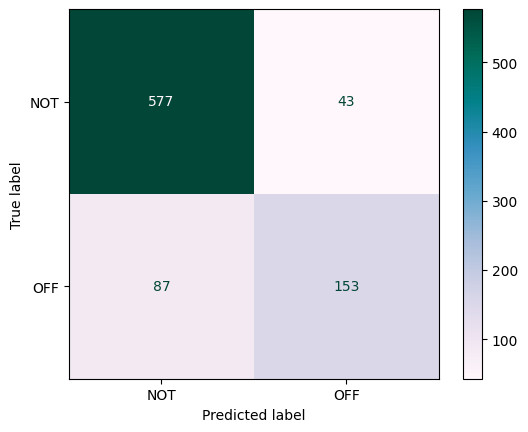

In [7]:
# Confusionn matrix In Domain
ConfusionMatrixDisplay.from_predictions(test_indomain.labels, test_indomain.predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])

In [8]:
# Classification report Cross Domain
print(report(test_crossdomain.labels, test_crossdomain.predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       620
           1       0.69      0.50      0.58       240

    accuracy                           0.80       860
   macro avg       0.76      0.71      0.73       860
weighted avg       0.79      0.80      0.79       860



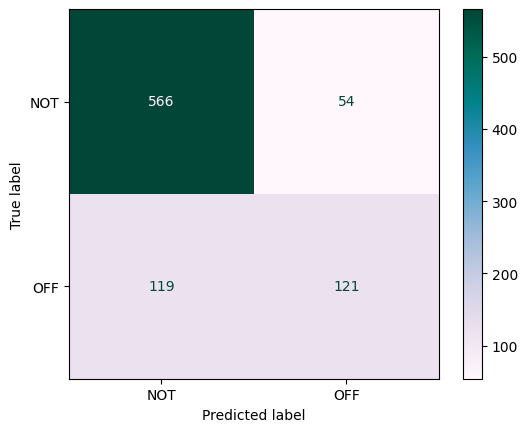

In [9]:
# Confusionn matrix Cross Domain
ConfusionMatrixDisplay.from_predictions(test_crossdomain.labels, test_crossdomain.predictions, cmap='PuBuGn', display_labels=["NOT", "OFF"])